In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

plt.rcParams['figure.figsize'] = 18,8

In [2]:
def extract_data(path, wl, t='1.0sec', ori = "unk"):
    
    f = h5.File(path, 'r')
    gp = f['spectra'][wl][ori][t]
    
    sp_data = gp['sp_data']; bg_data = gp['bg_data']; powers = gp['power_samples']
    
    return sp_data, bg_data, powers

def gaussian(x,m,s,A):
    return A * np.exp(-(x-m)**2/(2*s**2))

def two_gauss(x,m1,m2,s1,s2,A1,A2):
    return gaussian(x,m1,s1,A1) + gaussian(x,m2,s2,A2)

In [3]:
path_to_study = "/home/hargy/Documents/3CS/repo_data3cs/data3cs/studies/zno_ref"

sample = 'ZnO_B3_500'
coll1  = os.listdir(f'{path_to_study}/coll1')

In [6]:
areas  = []
powers = []
times  = np.linspace(0,1500, 100)
for i in range(0,100):
    sp, bg, pw = extract_data(f'{path_to_study}/coll1/{sample}_{i}.hdf5', '400')
    x = sp[0]['em_wl']; y = sp[0]['count']
    y = np.subtract(y, bg[0]['count'])
    y = np.divide(y,pw[0])
    
    area = np.trapz(y,x) # / pw[0]
    areas.append(area)
    powers.append(pw[0])
    
areas_norm = np.divide(areas, np.amax(areas)) 
powers_norm = np.divide(powers, np.amax(powers))

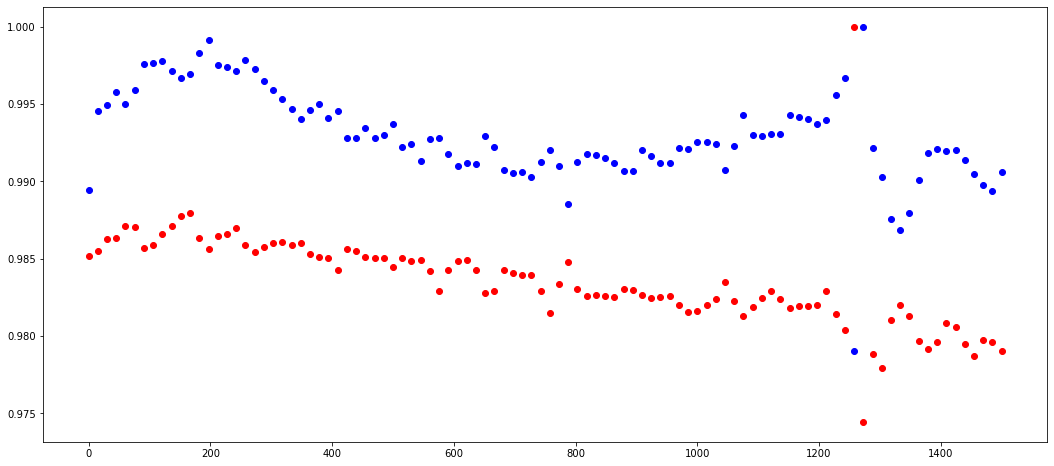

In [7]:
plt.scatter(times, areas_norm, color='blue')
plt.scatter(times, powers_norm, color='red')

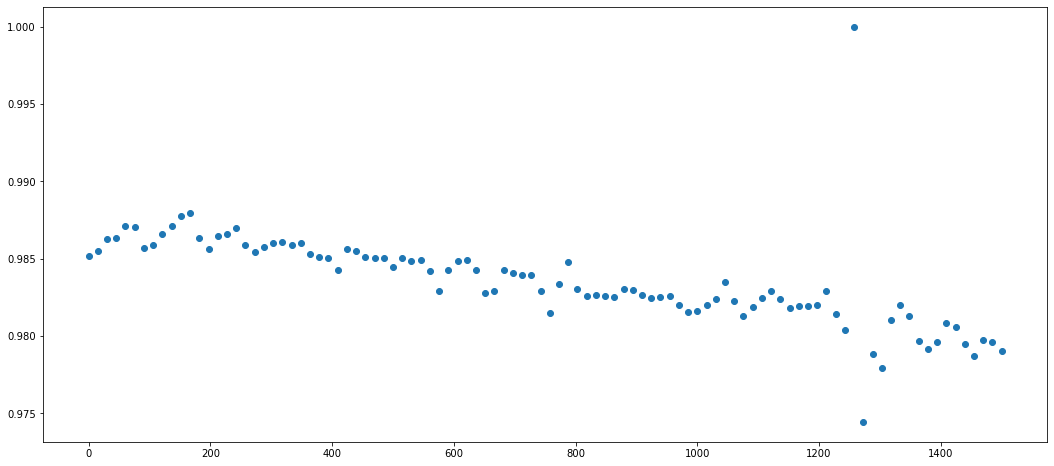

In [6]:
plt.scatter(times, powers_norm)

In [7]:
np.amax(areas)

7469290.392593384

In [8]:
sp, bg, pw = extract_data(f'{path_to_study}/coll1/{sample}_{i}.hdf5', '400')

In [9]:
pw

<HDF5 dataset "power_samples": shape (1,), type "<f8">

In [12]:
pw[0]

9.319173333333333e-06